In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn import tree, metrics, svm
from sklearn.svm import SVC
from sklearn.metrics import roc_curve

In [117]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 

X['target'] = y
X.head(5)


,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,target
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [118]:
X.tail(5)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,target
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840,3
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560,3


In [119]:
print('Количество семплов: ', X.shape[0])
print(X.info())
#print(X.describe())

Количество семплов:  178
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-n

In [120]:
X.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [121]:
X.corr()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,target
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malicacid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


C:\Users\lenovo\AppData\Local\Temp\ipykernel_16368\1179390223.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['Alcohol'], bins=15)


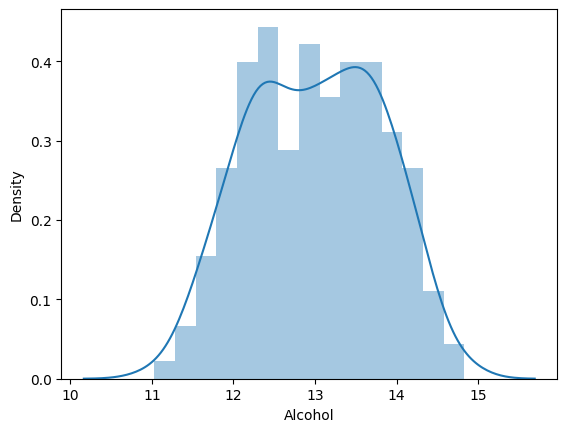

In [122]:
#sns.histplot(data=X["Alcohol"])
sns.distplot(X['Alcohol'], bins=15)
plt.show()

<Axes: >

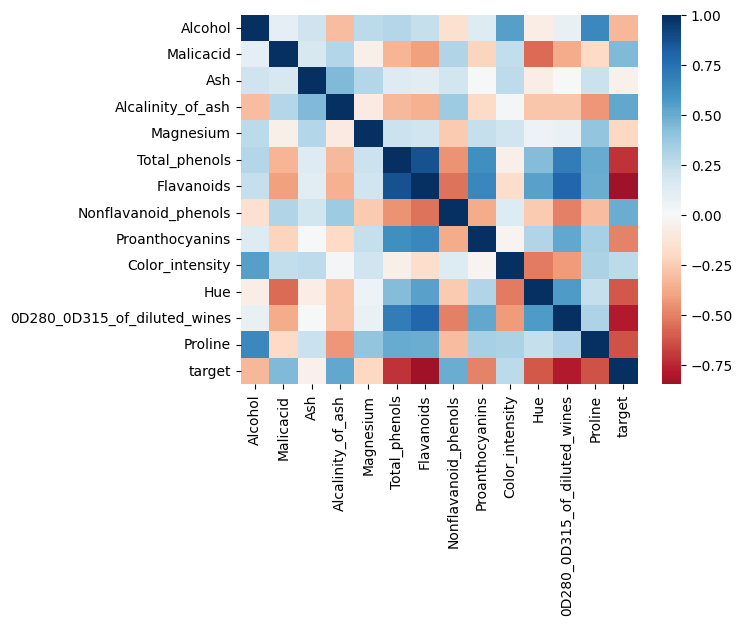

In [123]:
sns.heatmap(X.corr(), center = 0, cmap="RdBu")

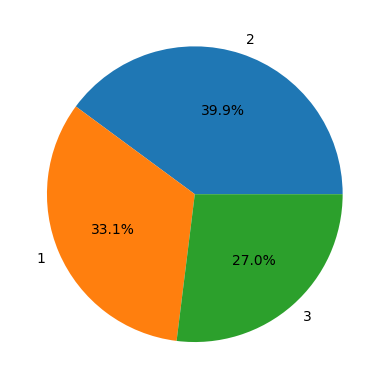

In [124]:
fig, ax = plt.subplots()
ax.pie(X['target'].value_counts(), labels=X['target'].value_counts().keys(), autopct='%1.1f%%')
plt.show()


In [125]:
def distribution(data, feather):
    c1 = data[data['target'] == 1][feather]
    sns.distplot(c1, bins=5)
    c2 = data[data['target'] == 2][feather]
    sns.distplot(c2, bins=5)
    c3 = data[data['target'] == 3][feather]
    sns.distplot(c3, bins=5)
    plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16368\3315412596.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1, bins=5)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16368\3315412596.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2, bins=5)
C:\Users\lenovo\AppData\Local\Temp\ipykernel

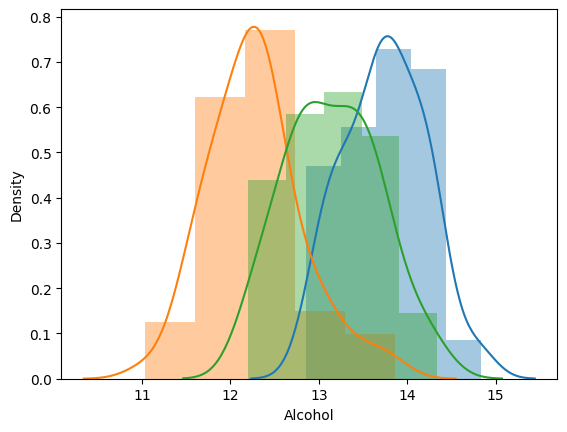

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16368\3315412596.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1, bins=5)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16368\3315412596.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2, bins=5)
C:\Users\lenovo\AppData\Local\Temp\ipykernel

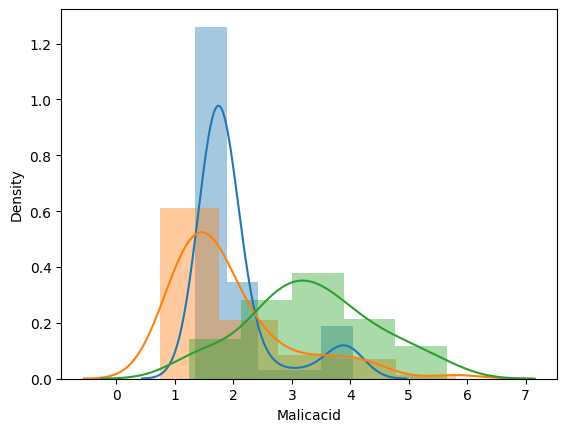

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16368\3315412596.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1, bins=5)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16368\3315412596.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2, bins=5)
C:\Users\lenovo\AppData\Local\Temp\ipykernel

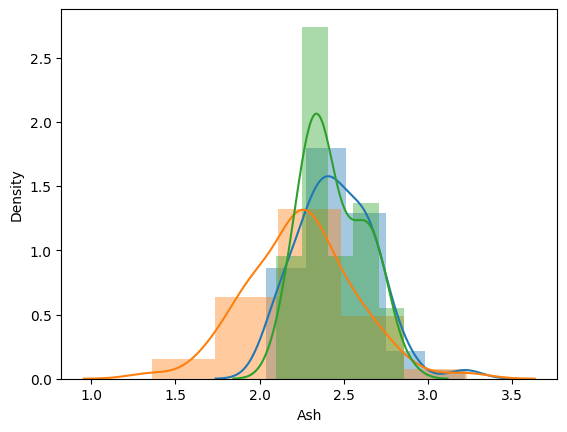

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16368\3315412596.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1, bins=5)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16368\3315412596.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2, bins=5)
C:\Users\lenovo\AppData\Local\Temp\ipykernel

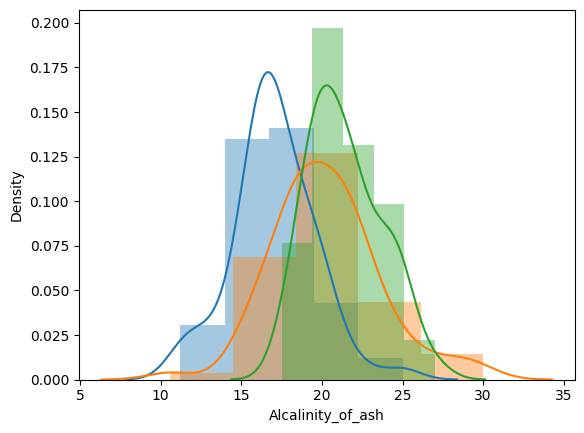

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16368\3315412596.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1, bins=5)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16368\3315412596.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2, bins=5)
C:\Users\lenovo\AppData\Local\Temp\ipykernel

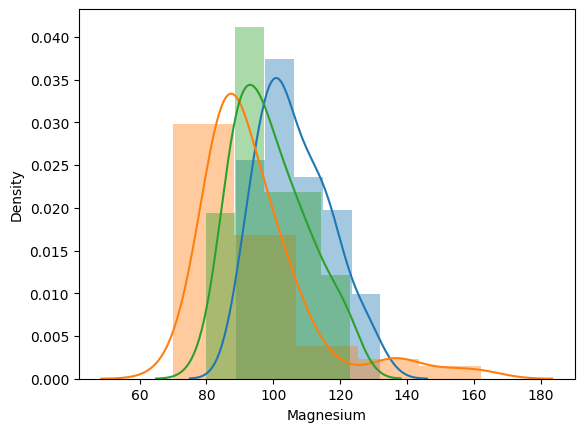

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16368\3315412596.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1, bins=5)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16368\3315412596.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2, bins=5)
C:\Users\lenovo\AppData\Local\Temp\ipykernel

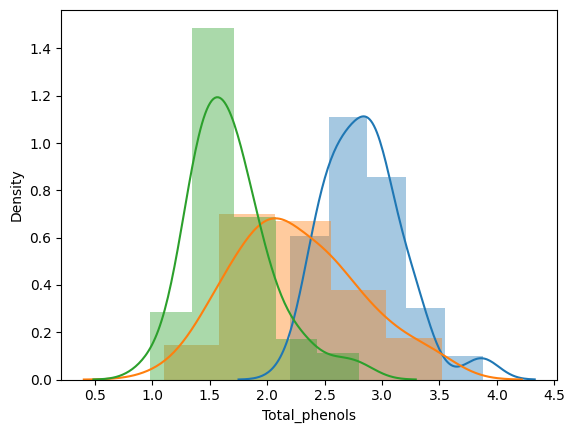

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16368\3315412596.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1, bins=5)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16368\3315412596.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2, bins=5)
C:\Users\lenovo\AppData\Local\Temp\ipykernel

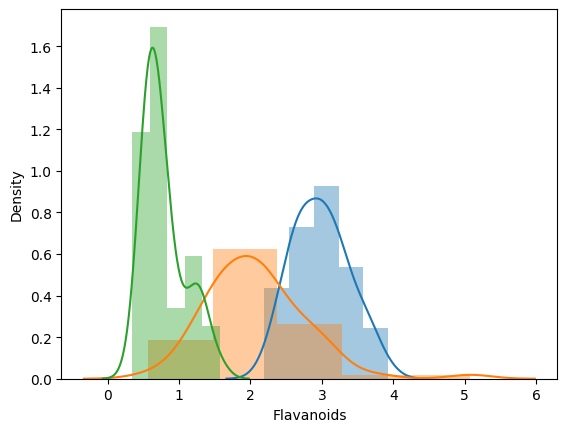

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16368\3315412596.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1, bins=5)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16368\3315412596.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2, bins=5)
C:\Users\lenovo\AppData\Local\Temp\ipykernel

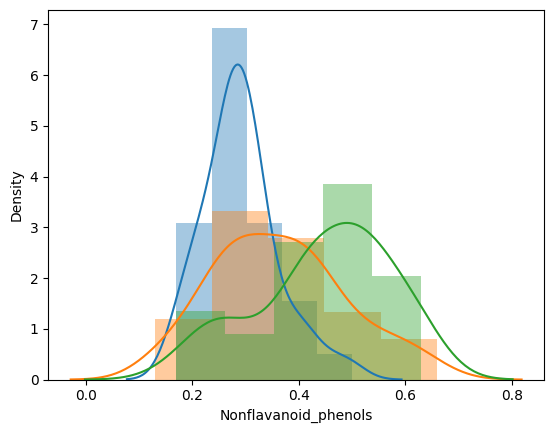

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16368\3315412596.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1, bins=5)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16368\3315412596.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2, bins=5)
C:\Users\lenovo\AppData\Local\Temp\ipykernel

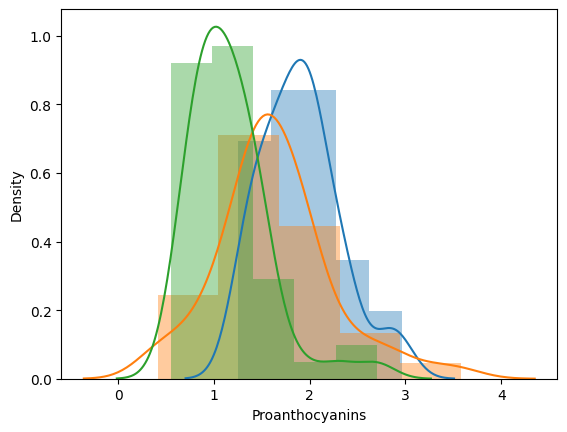

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16368\3315412596.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1, bins=5)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16368\3315412596.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2, bins=5)
C:\Users\lenovo\AppData\Local\Temp\ipykernel

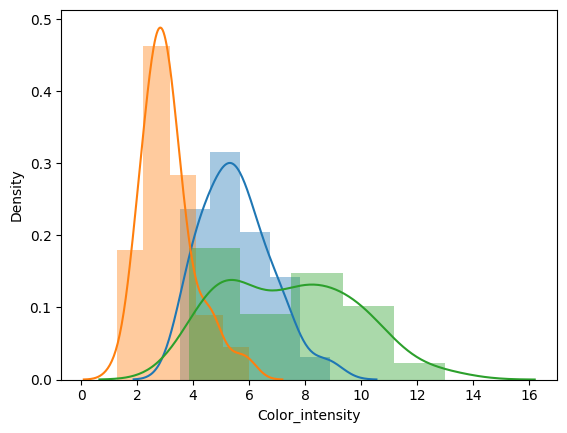

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16368\3315412596.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1, bins=5)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16368\3315412596.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2, bins=5)
C:\Users\lenovo\AppData\Local\Temp\ipykernel

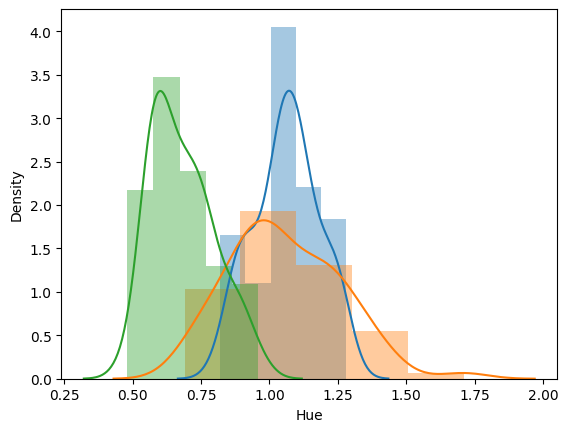

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16368\3315412596.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1, bins=5)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16368\3315412596.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2, bins=5)
C:\Users\lenovo\AppData\Local\Temp\ipykernel

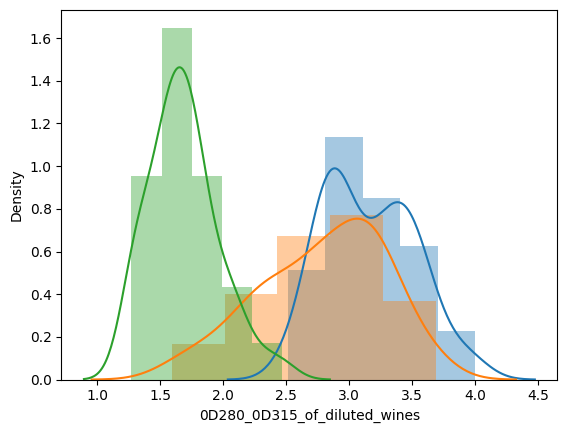

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16368\3315412596.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1, bins=5)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16368\3315412596.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2, bins=5)
C:\Users\lenovo\AppData\Local\Temp\ipykernel

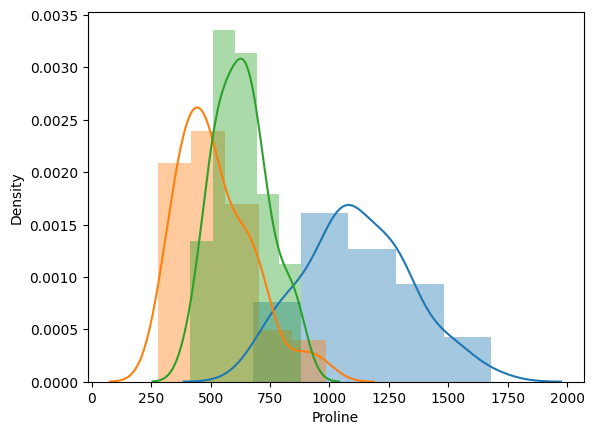

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16368\3315412596.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1, bins=5)
c:\Users\lenovo\Documents\neironky\.venv\lib\site-packages\seaborn\distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16368\3315412596.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) 

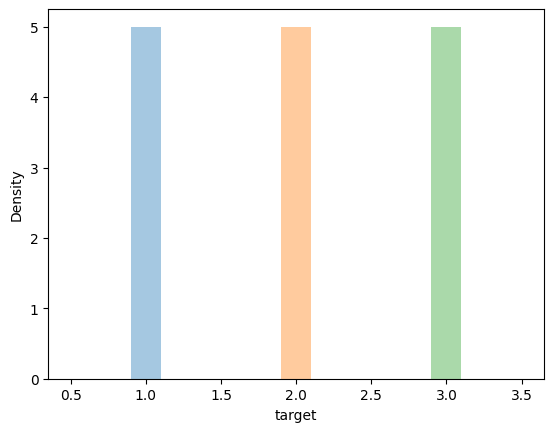

In [126]:
names = X.columns
for i in names:
    distribution(X, i)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=['target']), y, train_size=0.8, random_state=50)

In [128]:
C = X.corr().abs()
C['bestCor'] = C[C < 1].max()
C['indexBest'] = C[C < 1].idxmax()
C['worstCor'] = C.min()
C['indexWorst'] = C.idxmin()
C

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,target,bestCor,indexBest,worstCor,indexWorst
Alcohol,1.000000,0.094397,0.211545,0.310235,0.270798,0.289101,0.236815,0.155929,0.136698,0.546364,0.071747,0.072343,0.643720,0.328222,0.643720,Proline,0.071747,Hue
Malicacid,0.094397,1.000000,0.164045,0.288500,0.054575,0.335167,0.411007,0.292977,0.220746,0.248985,0.561296,0.368710,0.192011,0.437776,0.561296,Hue,0.054575,Magnesium
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,0.074667,0.003911,0.223626,0.049643,0.443367,Alcalinity_of_ash,0.003911,0D280_0D315_of_diluted_wines
Alcalinity_of_ash,0.310235,0.288500,0.443367,1.000000,0.083333,0.321113,0.351370,0.361922,0.197327,0.018732,0.273955,0.276769,0.440597,0.517859,0.517859,target,0.018732,Color_intensity
Magnesium,0.270798,0.054575,0.286587,0.083333,1.000000,0.214401,0.195784,0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,0.209179,0.393351,Proline,0.054575,Malicacid
Total_phenols,0.289101,0.335167,0.128980,0.321113,0.214401,1.000000,0.864564,0.449935,0.612413,0.055136,0.433681,0.699949,0.498115,0.719163,0.864564,Flavanoids,0.055136,Color_intensity
Flavanoids,0.236815,0.411007,0.115077,0.351370,0.195784,0.864564,1.000000,0.537900,0.652692,0.172379,0.543479,0.787194,0.494193,0.847498,0.864564,Total_phenols,0.115077,Ash
Nonflavanoid_phenols,0.155929,0.292977,0.186230,0.361922,0.256294,0.449935,0.537900,1.000000,0.365845,0.139057,0.262640,0.503270,0.311385,0.489109,0.537900,Flavanoids,0.139057,Color_intensity
Proanthocyanins,0.136698,0.220746,0.009652,0.197327,0.236441,0.612413,0.652692,0.365845,1.000000,0.025250,0.295544,0.519067,0.330417,0.499130,0.652692,Flavanoids,0.009652,Ash
Color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,0.055136,0.172379,0.139057,0.025250,1.000000,0.521813,0.428815,0.316100,0.265668,0.546364,Alcohol,0.018732,Alcalinity_of_ash


In [129]:
clfCorr = tree.DecisionTreeClassifier(criterion='gini', max_depth = 13)
clfCorr.fit(X_train[['Flavanoids', 'Total_phenols']], y_train) #лучшая корреляция
y_pred_Corr = clfCorr.predict(X_test[['Flavanoids', 'Total_phenols']])

In [130]:
report = metrics.classification_report(y_test, y_pred_Corr)
print(report)
print(metrics.confusion_matrix(y_test, y_pred_Corr))

              precision    recall  f1-score   support

           1       0.82      0.69      0.75        13
           2       0.73      0.79      0.76        14
           3       0.90      1.00      0.95         9

    accuracy                           0.81        36
   macro avg       0.82      0.83      0.82        36
weighted avg       0.81      0.81      0.80        36

[[ 9  4  0]
 [ 2 11  1]
 [ 0  0  9]]


In [131]:
clfNotCorr = tree.DecisionTreeClassifier(criterion='gini', max_depth = 13)
clfNotCorr.fit(X_train[['Ash', '0D280_0D315_of_diluted_wines']], y_train) #худшая корреляция
y_pred_NotCorr = clfNotCorr.predict(X_test[['Ash', '0D280_0D315_of_diluted_wines']])

In [132]:
report = metrics.classification_report(y_test, y_pred_NotCorr)
print(report)
print(metrics.confusion_matrix(y_test, y_pred_NotCorr))

              precision    recall  f1-score   support

           1       0.70      0.54      0.61        13
           2       0.56      0.71      0.62        14
           3       0.88      0.78      0.82         9

    accuracy                           0.67        36
   macro avg       0.71      0.68      0.69        36
weighted avg       0.69      0.67      0.67        36

[[ 7  6  0]
 [ 3 10  1]
 [ 0  2  7]]


In [133]:
clfSvc = SVC(kernel = 'linear', probability=True)
clfSvc.fit(X_train, y_train) #лучшая корреляция
y_pred_Svc = clfSvc.predict(X_test)

c:\Users\lenovo\Documents\neironky\.venv\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [134]:
report = metrics.classification_report(y_test, y_pred_Svc)
print(report)
print(metrics.confusion_matrix(y_test, y_pred_Svc))

              precision    recall  f1-score   support

           1       0.93      1.00      0.96        13
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36

[[13  0  0]
 [ 1 13  0]
 [ 0  0  9]]


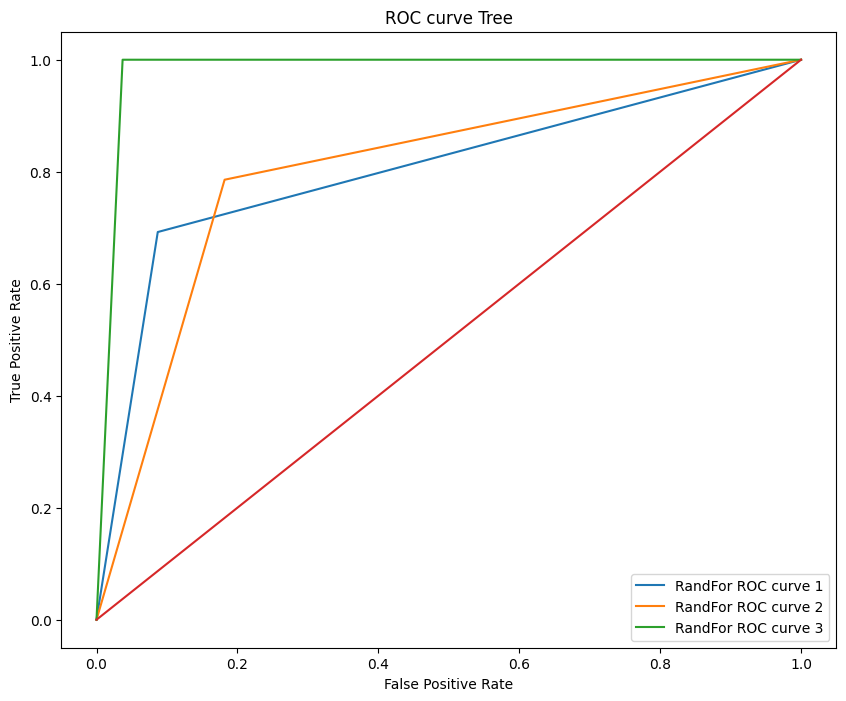

In [135]:
plt.figure(figsize=(10, 8))
for i in range(3):
    fpr, tpr, thresholds = roc_curve(y_test, clfCorr.predict_proba(X_test[['Flavanoids', 'Total_phenols']])[:,i], pos_label=i+1)
    plt.plot(fpr, tpr, label=f'RandFor ROC curve {i+1}')
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve Tree')
plt.legend()
plt.show()

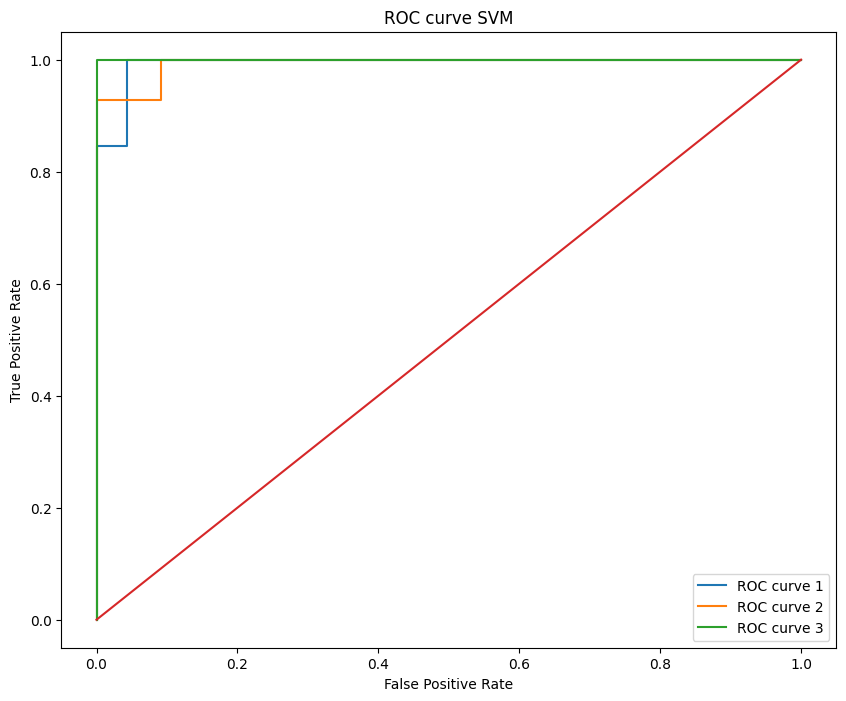

In [136]:
clfSvc.predict_proba(X_test)
plt.figure(figsize=(10, 8))
for i in range(3):
    fpr, tpr, thresholds = roc_curve(y_test, clfSvc.predict_proba(X_test)[:,i], pos_label=i+1)
    plt.plot(fpr, tpr, label=f'ROC curve {i+1}')
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve SVM')
plt.legend()
plt.show()